In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_train[:7]

array([6, 9, 9, 4, 1, 1, 2], dtype=uint8)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(X,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


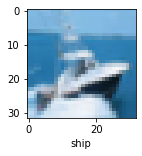

In [6]:
plot_sample(X_train,y_train,8)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
cnn = models.Sequential([
                         #cnn
                         layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         #dense
                         layers.Flatten(),
                         layers.Dense(3000,activation='relu'),
                         layers.Dense(10,activation='softmax')

])

In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 5ms/step - loss: 1.3264 - accuracy: 0.5259
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9235 - accuracy: 0.6773
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6964 - accuracy: 0.7568
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4867 - accuracy: 0.8316
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2949 - accuracy: 0.9009
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1716 - accuracy: 0.9437
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1163 - accuracy: 0.9623
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0936 - accuracy: 0.9697
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0789 - accuracy: 0.9736
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.07

In [11]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 1.7904 - accuracy: 0.7053


[1.7903872728347778, 0.705299973487854]

In [12]:
y_test = y_test.reshape(-1,)
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

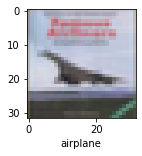

In [13]:
plot_sample(X_test,y_test,3)

In [14]:
y_pred  = cnn.predict(X_test)


In [15]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [16]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

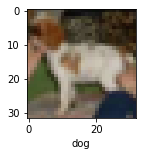

In [17]:
plot_sample(X_test,y_test,12)

In [18]:
classes[y_classes[12]]

'dog'

In [19]:
from sklearn.metrics import classification_report
print("classification Report: \n",classification_report(y_test,y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      1000
           1       0.83      0.80      0.82      1000
           2       0.58      0.64      0.61      1000
           3       0.53      0.47      0.50      1000
           4       0.67      0.65      0.66      1000
           5       0.56      0.67      0.61      1000
           6       0.83      0.74      0.78      1000
           7       0.73      0.78      0.75      1000
           8       0.82      0.80      0.81      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

